# Predict Whether a Customer Shall Sign a Loan Or Not

## Importing Libraries For DataSet and Visualization

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load the DataSet

In [3]:
dataDF = pd.read_csv("./Data/data.csv")

In [4]:
dataDF.shape

(17908, 21)

In [5]:
dataDF.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [6]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17908 entries, 0 to 17907
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   entry_id              17908 non-null  int64  
 1   age                   17908 non-null  int64  
 2   pay_schedule          17908 non-null  object 
 3   home_owner            17908 non-null  int64  
 4   income                17908 non-null  int64  
 5   months_employed       17908 non-null  int64  
 6   years_employed        17908 non-null  int64  
 7   current_address_year  17908 non-null  int64  
 8   personal_account_m    17908 non-null  int64  
 9   personal_account_y    17908 non-null  int64  
 10  has_debt              17908 non-null  int64  
 11  amount_requested      17908 non-null  int64  
 12  risk_score            17908 non-null  int64  
 13  risk_score_2          17908 non-null  float64
 14  risk_score_3          17908 non-null  float64
 15  risk_score_4       

## Feature Engineering

In [7]:
dataDF.isnull().sum().sum()

0

In [8]:
dataDF.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [9]:
uuid = dataDF['entry_id']

In [10]:
dataDF['employed_months'] = dataDF['months_employed'] + dataDF['years_employed'] * 12

In [11]:
dataDF.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,employed_months
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,36
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0,72
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0,6
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1,72
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,60


In [12]:
X = dataDF.drop(columns=['entry_id', 'months_employed', 'years_employed', 'e_signed'])

Y = dataDF['e_signed']

In [13]:
X.head()

,age,pay_schedule,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,employed_months
0,40,bi-weekly,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,36
1,61,weekly,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,72
2,23,weekly,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,6
3,40,bi-weekly,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,72
4,33,semi-monthly,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,60


In [14]:
X.describe()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,employed_months
count,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,43.015412,0.425173,3657.214653,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,43.508320
std,11.873107,0.494383,1504.890063,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,26.765085
min,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,34.000000,0.000000,2580.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,24.000000
50%,42.000000,0.000000,3260.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,36.000000
75%,51.000000,1.000000,4670.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,60.000000
max,96.000000,1.000000,9985.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,201.000000


## Data Visualization

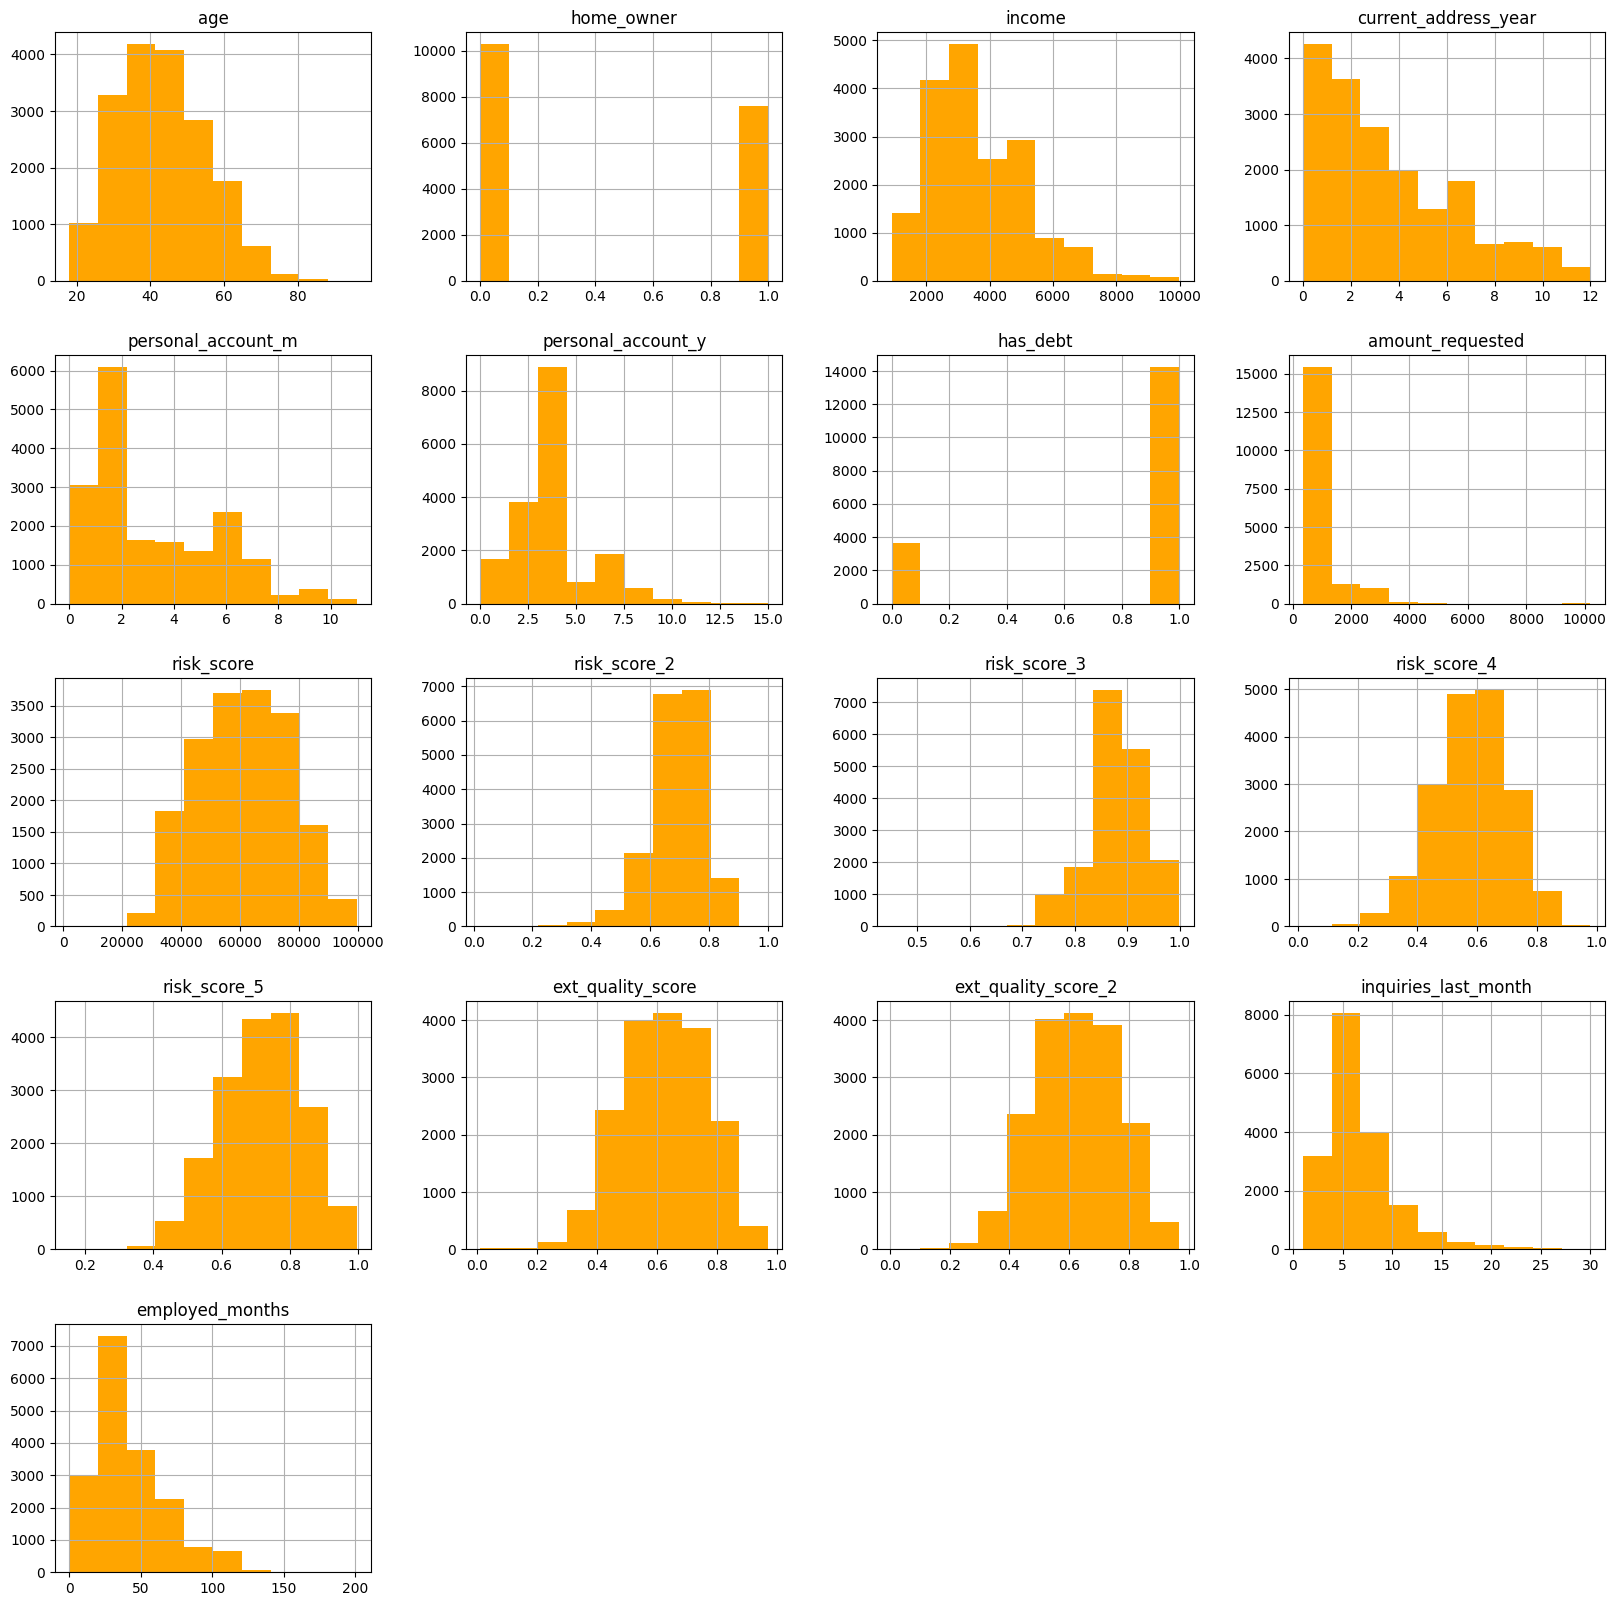

In [15]:
X.hist(figsize=(20, 20), color='orange')

plt.show()

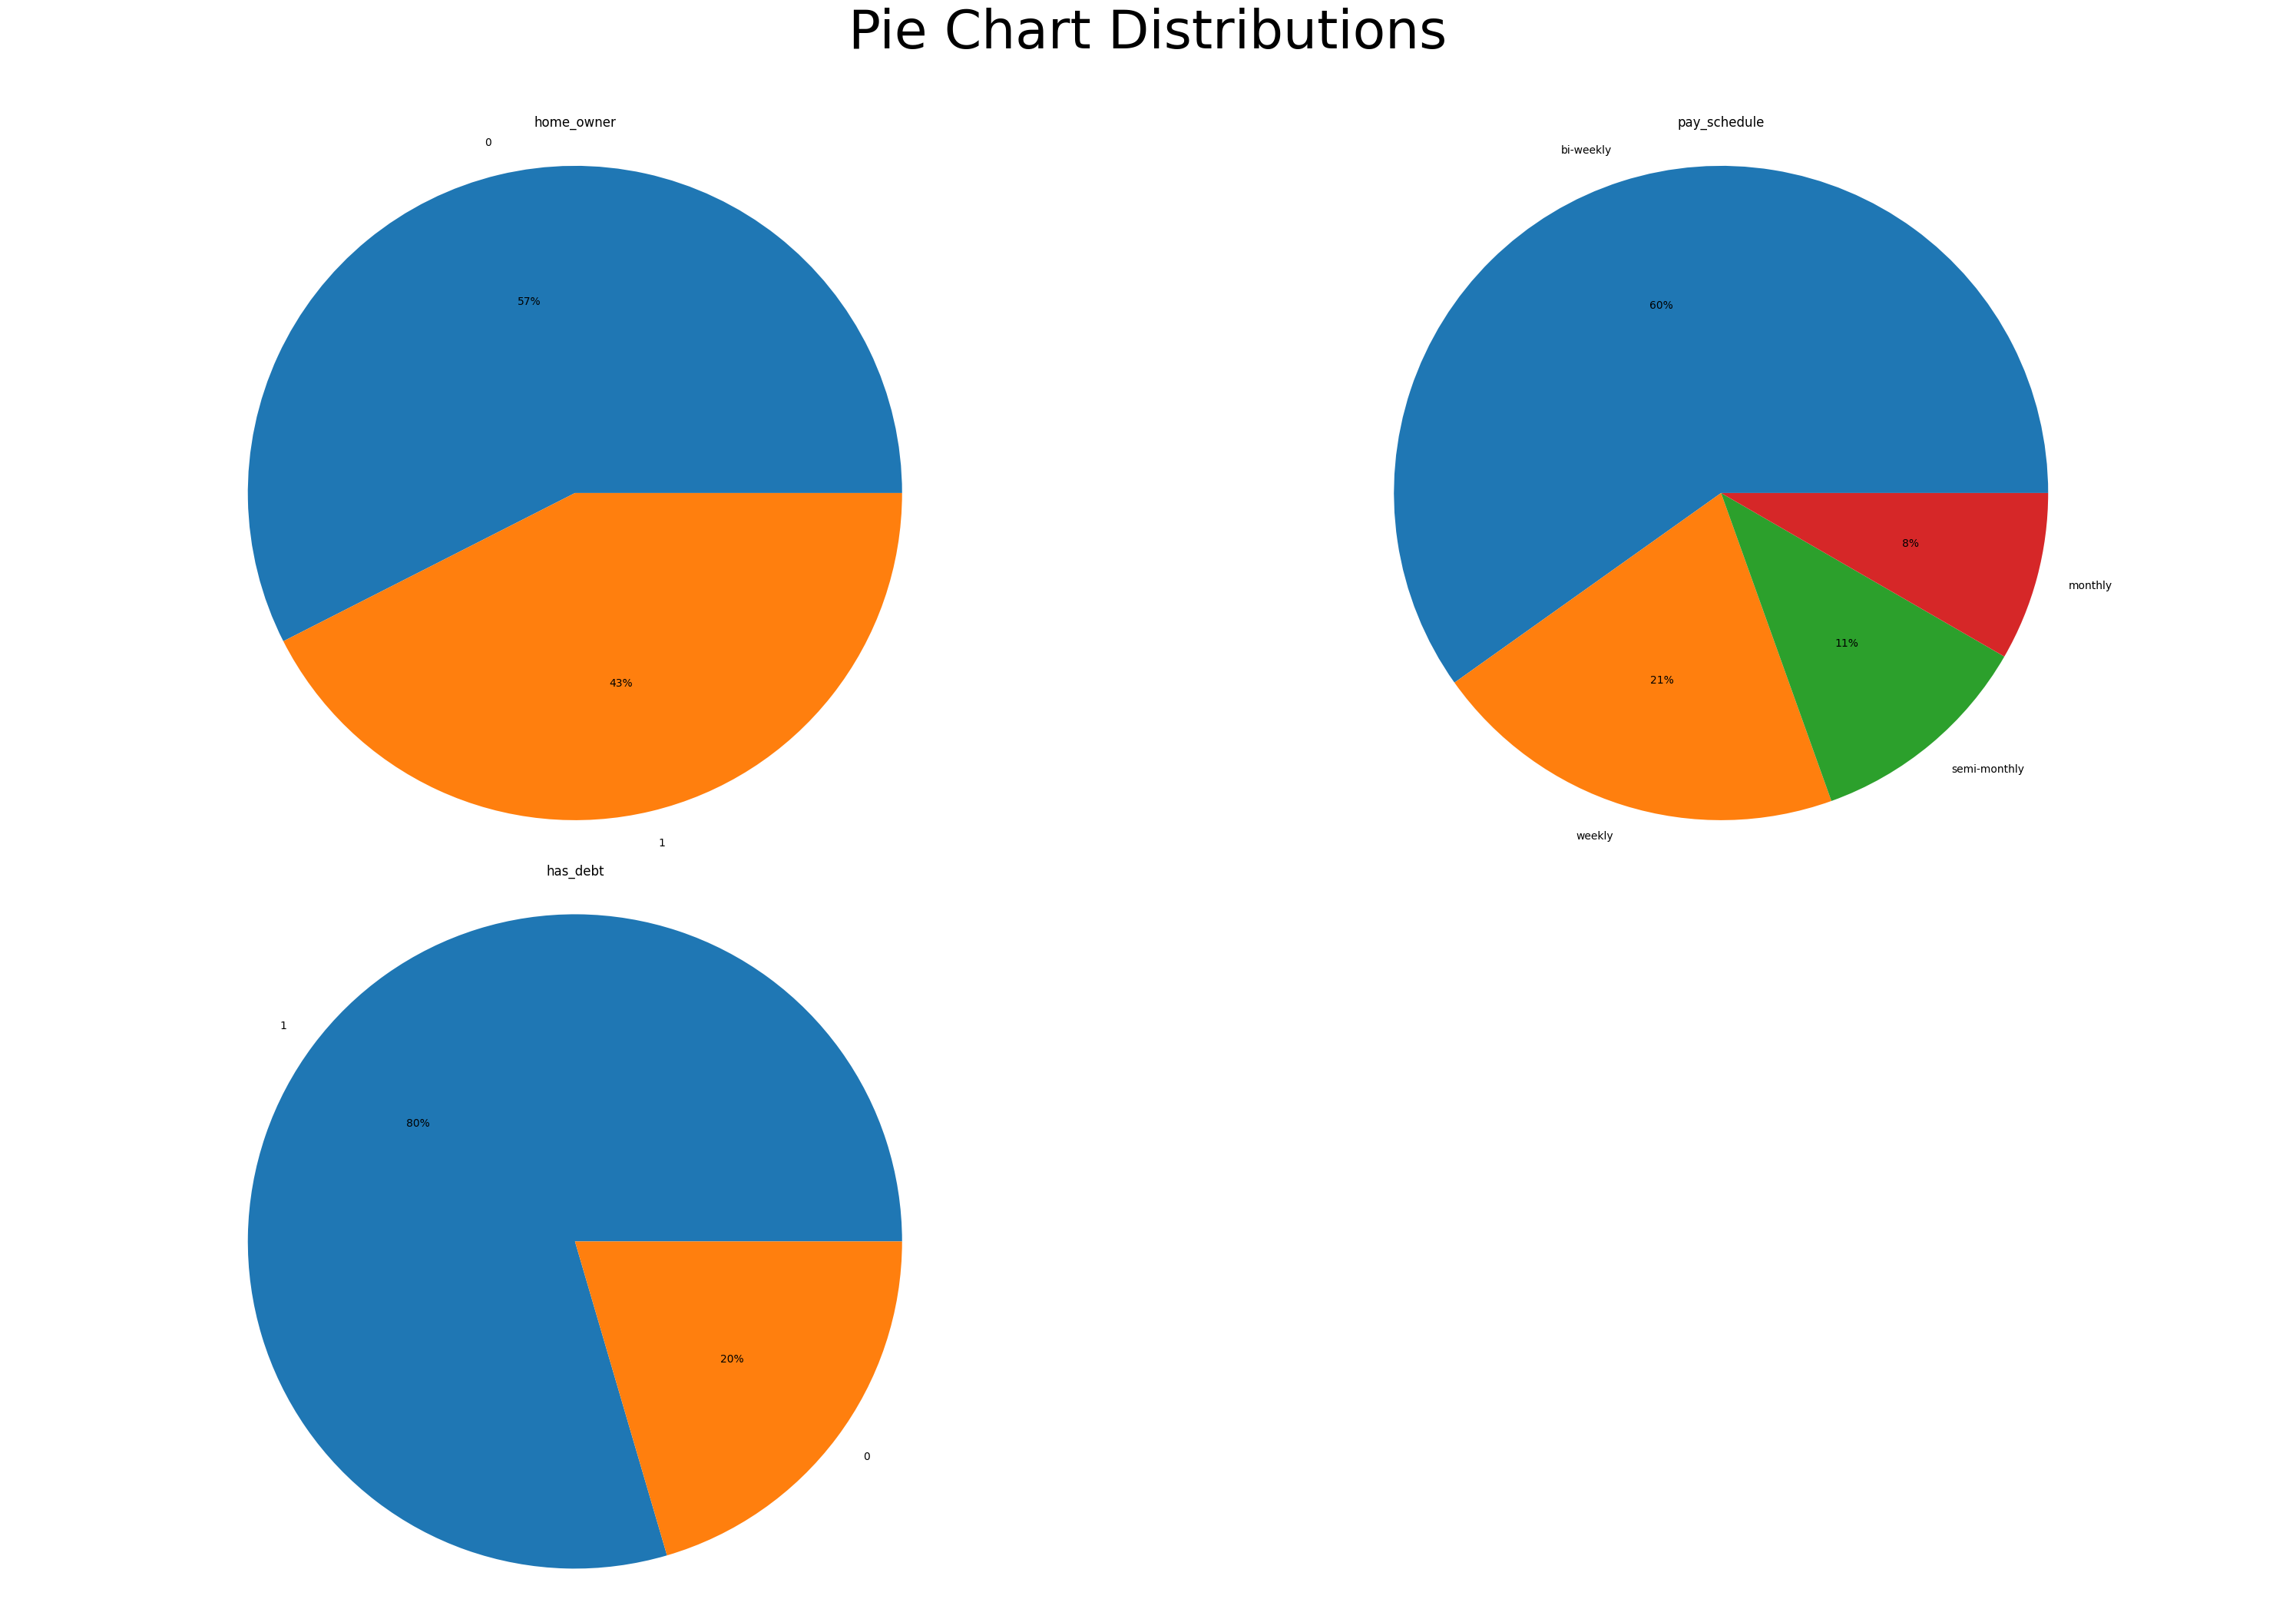

In [16]:
dataset = X[['home_owner', 'pay_schedule', 'has_debt']]

fig1 = plt.figure(figsize=(30, 22))
plt.suptitle('Pie Chart Distributions', fontsize=50)

for i in range(1, dataset.shape[1] + 1):
  plt.subplot(2, 2, i)
  fig2 = plt.gca()
  fig2.axes.get_yaxis().set_visible(False)
  fig2.set_title(dataset.columns.values[i - 1])

  values = dataset.iloc[:, i - 1].value_counts(normalize = True).values
  index = dataset.iloc[:, i - 1].value_counts(normalize = True).index
  plt.pie(values, labels = index, autopct='%1.f%%')
  plt.axis('equal')

fig1.tight_layout(rect=[0, 0.03, 1, 0.96])

<Axes: >

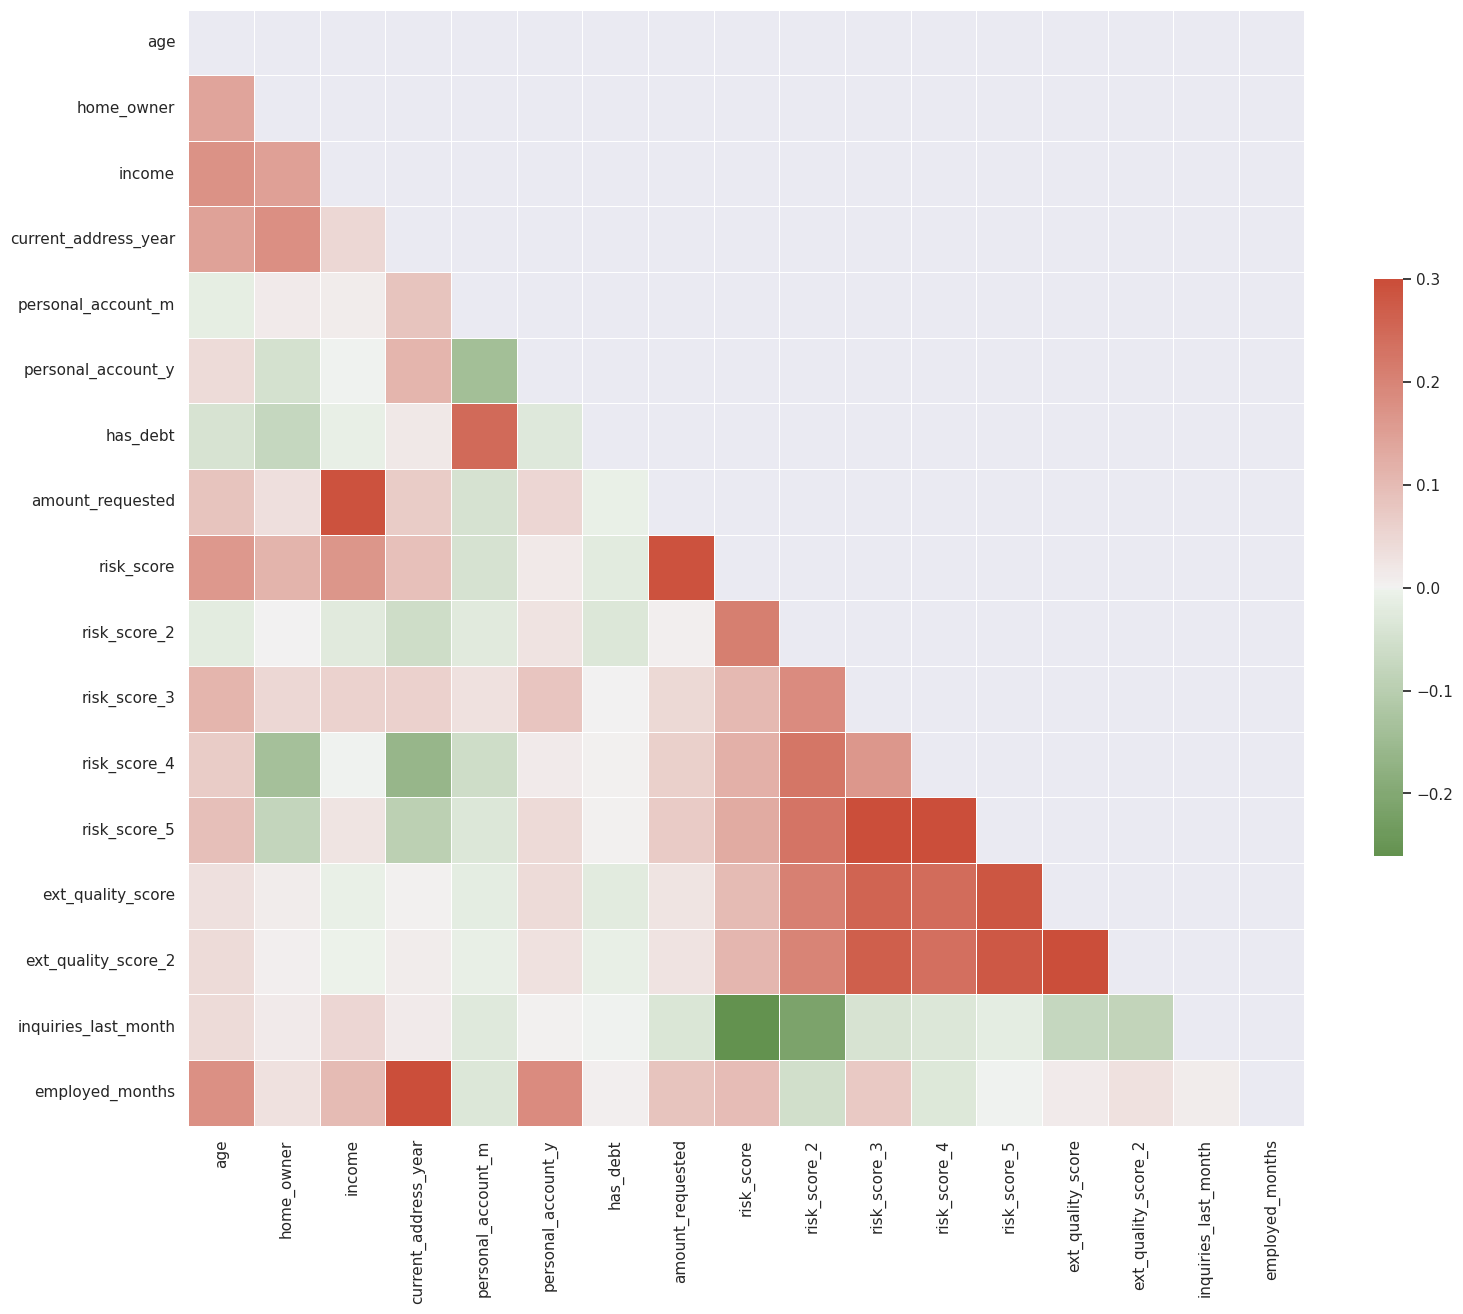

In [17]:
## Correlation Matrix
sns.set(style="dark")

# Selecting numeric fields only
X_numeric = X.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr = X_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 17, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
X.head()

,age,pay_schedule,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,employed_months
0,40,bi-weekly,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,36
1,61,weekly,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,72
2,23,weekly,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,6
3,40,bi-weekly,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,72
4,33,semi-monthly,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,60


## One-Hot Encoding

In [19]:
X = pd.get_dummies(X)

X.head()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,employed_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,40,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,36,True,False,False,False
1,61,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,72,False,False,False,True
2,23,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,6,False,False,False,True
3,40,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,72,True,False,False,False
4,33,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,60,False,False,True,False


In [20]:
bool_cols = X.select_dtypes(include=[bool]).columns

In [21]:
X[bool_cols] = X[bool_cols].astype(int)

In [22]:
X.head()

,age,home_owner,income,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,employed_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_semi-monthly,pay_schedule_weekly
0,40,1,3135,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,36,1,0,0,0
1,61,0,3180,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,72,0,0,0,1
2,23,0,1540,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,6,0,0,0,1
3,40,0,5230,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,72,1,0,0,0
4,33,0,3590,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,60,0,0,1,0


In [23]:
X.shape

(17908, 21)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
SS = StandardScaler()

In [26]:
X = SS.fit_transform(X)

In [27]:
X = pd.DataFrame(X)

X.shape

(17908, 21)

In [28]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-0.253977,1.162748,-0.347022,-0.212478,1.160820,-0.768775,0.50718,-0.573275,-1.616642,0.514223,0.462623,-0.763184,-1.675935,-0.301983,-1.723802,0.964548,-0.280535,0.819235,-0.301475,-0.354973,-0.509963
1,1.514775,-0.860031,-0.317118,-0.212478,-0.643926,1.788098,0.50718,-0.501696,-2.009657,0.526513,0.050418,1.041669,0.896068,0.770140,0.061845,0.692290,1.064539,-1.220651,-0.301475,-0.354973,1.960928
2,-1.685824,-0.860031,-1.406929,-1.302650,1.612007,-1.280150,0.50718,-0.716434,-1.723828,-0.529297,-2.047629,0.094863,0.364822,-0.654147,-0.645889,0.147774,-1.401429,-1.220651,-0.301475,-0.354973,1.960928
3,-0.253977,-0.860031,1.045146,-0.939260,-0.643926,1.788098,0.50718,-0.358537,-1.230123,-0.283571,1.513086,1.476706,0.501921,1.212668,-0.210989,0.420032,1.064539,0.819235,-0.301475,-0.354973,-0.509963
4,-0.843561,-0.860031,-0.044665,-0.575869,-0.643926,2.299472,0.50718,0.214099,-0.470078,-0.812623,-0.379682,0.242545,-0.436878,0.869722,0.876131,1.509063,0.616181,-1.220651,-0.301475,2.817113,-0.509963


## Balancing The DataSet

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
Y.value_counts()

e_signed
1    9639
0    8269
Name: count, dtype: int64

In [31]:
SE = SMOTE(random_state=42)

X_res_OS, Y_res_OS = SE.fit_resample(X, Y)

pd.Series(Y_res_OS).value_counts()

e_signed
1    9639
0    9639
Name: count, dtype: int64

In [32]:
X_res_OS.shape

(19278, 21)

## Model Fitting And Evaluation

In [33]:
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle

In [34]:
def fitModelAndEvaluate(X, Y, model_name, model_algo, params, CV):
    """
    Fits a machine learning model using GridSearchCV and evaluates its performance.

    Parameters:
    X (array-like): Features dataset.
    Y (array-like): Target dataset.
    model_name (str): Name of the model (for display purposes).
    model_algo (estimator object): Machine learning algorithm to use.
    params (dict): Dictionary with parameters names as keys and lists of parameter settings to try as values.
    CV (int): Number of cross-validation folds.

    Returns:
    None
    """

    # Set a random seed for reproducibility
    np.random.seed(10)

    # Split the data into training and testing sets
    print("\nSplitting the data into training and testing sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
    print("Data split complete.\n")

    # Initialize GridSearchCV
    print(f"Initializing GridSearchCV for {model_name} with {CV}-fold cross-validation...\n")
    grid = GridSearchCV(
        estimator=model_algo,
        param_grid=params,
        cv=CV,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )

    # Fit the model and find the best parameters
    print("Fitting the model and finding the best parameters...\n")
    grid_res = grid.fit(X_train, y_train)
    best_params = grid_res.best_params_
    print("Model fitting complete.\n")

    # Predict on the test set
    print("Predicting on the test set...\n")
    y_pred = grid_res.predict(X_test)

    # Calculate evaluation metrics
    print("Calculating evaluation metrics...\n")
    acc_score = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)

    # Print the results in a well-formatted manner
    print("="*50)
    print(f"Results for {model_name}")
    print("="*50)
    print(f"Best Parameters:\n{best_params}\n")
    print(f"Accuracy Score: {acc_score:.4f}\n")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_mat)
    print("="*50)



> ## Logistic Regression



In [35]:
penalty = ['l1', 'l2']

c = np.logspace(0, 4, 10)

params = dict(C = c, penalty = penalty)

fitModelAndEvaluate(X_res_OS, Y_res_OS,
                    'LogisticRegression_OS',
                    LogisticRegression(),
                    params, CV=5)


Splitting the data into training and testing sets...
Data split complete.

Initializing GridSearchCV for LogisticRegression_OS with 5-fold cross-validation...

Fitting the model and finding the best parameters...

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Model fitting complete.

Predicting on the test set...

Calculating evaluation metrics...

Results for LogisticRegression_OS
Best Parameters:
{'C': 1.0, 'penalty': 'l2'}

Accuracy Score: 0.5840

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      1904
           1       0.59      0.59      0.59      1952

    accuracy                           0.58      3856
   macro avg       0.58      0.58      0.58      3856
weighted avg       0.58      0.58      0.58      3856

Confusion Matrix:
[[1109  795]
 [ 809 1143]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv



> ## Random Forest



In [36]:
params = {
    'n_estimators': [100, 500, 1500, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7]
}

fitModelAndEvaluate(X_res_OS, Y_res_OS,
                    'RandomForest',
                    RandomForestClassifier(),
                    params, CV=5)


Splitting the data into training and testing sets...
Data split complete.

Initializing GridSearchCV for RandomForest with 5-fold cross-validation...

Fitting the model and finding the best parameters...

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model fitting complete.

Predicting on the test set...

Calculating evaluation metrics...

Results for RandomForest
Best Parameters:
{'max_depth': 7, 'n_estimators': 2000}

Accuracy Score: 0.6416

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      1904
           1       0.69      0.54      0.60      1952

    accuracy                           0.64      3856
   macro avg       0.65      0.64      0.64      3856
weighted avg       0.65      0.64      0.64      3856

Confusion Matrix:
[[1421  483]
 [ 899 1053]]




> ## XGBoost



In [37]:
params = {
    'n_estimators': [100, 500, 1500, 2000],
    'max_depth': [2, 3, 4, 5, 6, 7]
}

fitModelAndEvaluate(X_res_OS, Y_res_OS,
                    'XGBoost',
                    XGBClassifier(),
                    params, CV=5)


Splitting the data into training and testing sets...
Data split complete.

Initializing GridSearchCV for XGBoost with 5-fold cross-validation...

Fitting the model and finding the best parameters...

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Model fitting complete.

Predicting on the test set...

Calculating evaluation metrics...

Results for XGBoost
Best Parameters:
{'max_depth': 2, 'n_estimators': 500}

Accuracy Score: 0.6512

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      1904
           1       0.65      0.66      0.66      1952

    accuracy                           0.65      3856
   macro avg       0.65      0.65      0.65      3856
weighted avg       0.65      0.65      0.65      3856

Confusion Matrix:
[[1223  681]
 [ 664 1288]]




> ## LightGBM



In [38]:
from lightgbm import LGBMClassifier

In [ ]:
params = {
    'learning_rate': [0.003, 0.001, 0.03, 0.01, 0.3, 0.1],
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [100, 500, 1000, 1500,2000]
}

fitModelAndEvaluate(X_res_OS, Y_res_OS,
                    'LightGBM',
                    LGBMClassifier(objective='binary',boosting_type='gbdt'),
                    params, CV=5)


Splitting the data into training and testing sets...
Data split complete.

Initializing GridSearchCV for LightGBM with 5-fold cross-validation...

Fitting the model and finding the best parameters...

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7687, number of negative: 7735
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3761
[LightGBM] [Info] Number of data points in the train set: 15422, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498



> ## CatBoost



In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

In [ ]:
params = {
    'learning_rate': [0.003, 0.001, 0.03, 0.01, 0.3, 0.1],
    'depth': [2, 5, 10, 16]
}

fitModelAndEvaluate(X_res_OS, Y_res_OS,
                    'CatBoost',
                    CatBoostClassifier(iterations=100),
                    params, CV=5)